In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import arviz as az

# EDA

In [2]:
dem = pd.read_csv('dem_candidates.csv')
rep = pd.read_csv('rep_candidates.csv')

In [3]:
list(enumerate(dem.columns))

[(0, 'Candidate'),
 (1, 'State'),
 (2, 'District'),
 (3, 'Office Type'),
 (4, 'Race Type'),
 (5, 'Race Primary Election Date'),
 (6, 'Primary Status'),
 (7, 'Primary Runoff Status'),
 (8, 'General Status'),
 (9, 'Partisan Lean'),
 (10, 'Primary %'),
 (11, 'Won Primary'),
 (12, 'Race'),
 (13, 'Veteran?'),
 (14, 'LGBTQ?'),
 (15, 'Elected Official?'),
 (16, 'Self-Funder?'),
 (17, 'STEM?'),
 (18, 'Obama Alum?'),
 (19, 'Party Support?'),
 (20, 'Emily Endorsed?'),
 (21, 'Guns Sense Candidate?'),
 (22, 'Biden Endorsed?'),
 (23, 'Warren Endorsed? '),
 (24, 'Sanders Endorsed?'),
 (25, 'Our Revolution Endorsed?'),
 (26, 'Justice Dems Endorsed?'),
 (27, 'PCCC Endorsed?'),
 (28, 'Indivisible Endorsed?'),
 (29, 'WFP Endorsed?'),
 (30, 'VoteVets Endorsed?'),
 (31, 'No Labels Support?')]

In [4]:
dem['General Status'] = dem['General Status'].fillna('None')
dem.iloc[:, 13:] = dem.iloc[:, 13:].fillna('No').replace({'Yes': 1, 'No': 0})
dem['Total Endorsements'] = dem.iloc[:, 19:].sum(axis=1)
dem['Party'] = 'D'

In [5]:
list(enumerate(rep.columns))

[(0, 'Candidate'),
 (1, 'State'),
 (2, 'District'),
 (3, 'Office Type'),
 (4, 'Race Type'),
 (5, 'Race Primary Election Date'),
 (6, 'Primary Status'),
 (7, 'Primary Runoff Status'),
 (8, 'General Status'),
 (9, 'Primary %'),
 (10, 'Won Primary'),
 (11, 'Rep Party Support?'),
 (12, 'Trump Endorsed?'),
 (13, 'Bannon Endorsed?'),
 (14, 'Great America Endorsed?'),
 (15, 'NRA Endorsed?'),
 (16, 'Right to Life Endorsed?'),
 (17, 'Susan B. Anthony Endorsed?'),
 (18, 'Club for Growth Endorsed?'),
 (19, 'Koch Support?'),
 (20, 'House Freedom Support?'),
 (21, 'Tea Party Endorsed?'),
 (22, 'Main Street Endorsed?'),
 (23, 'Chamber Endorsed?'),
 (24, 'No Labels Support?')]

In [6]:
rep['General Status'] = rep['General Status'].fillna('None')
rep.iloc[:, 11:] = rep.iloc[:, 11:].fillna('No').replace({'Yes': 1, 'No': 0})
rep['Total Endorsements'] = rep.iloc[:, 11:].sum(axis=1)
rep['Party'] = 'R'

In [7]:
rep.head()

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Primary %,...,Susan B. Anthony Endorsed?,Club for Growth Endorsed?,Koch Support?,House Freedom Support?,Tea Party Endorsed?,Main Street Endorsed?,Chamber Endorsed?,No Labels Support?,Total Endorsements,Party
0,Mike Dunleavy,AK,Governor of Alaska,Governor,Regular,8/21/18,Advanced,None,On the Ballot,61.8,...,0,0,0,0,0,0,0,0,0,R
1,Michael Sheldon,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,2.2,...,0,0,0,0,0,0,0,0,0,R
2,Mead Treadwell,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,31.9,...,0,0,0,0,0,0,0,0,0,R
3,Darin Colbry,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,0.6,...,0,0,0,0,0,0,0,0,0,R
4,Thomas Gordon,AK,Governor of Alaska,Governor,Regular,8/21/18,Lost,None,None,1.3,...,0,0,0,0,0,0,0,0,0,R


In [8]:
dem.head()

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,...,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?,Total Endorsements,Party
0,Anthony White (Alabama),AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,0,0,0,0,0,0,0,0,0,D
1,Christopher Countryman,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,0,0,0,0,0,0,0,0,0,D
2,"Doug ""New Blue"" Smith",AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,0,0,0,0,0,0,0,0,0,D
3,James C. Fields,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,0,0,0,0,0,0,0,0,0,D
4,Sue Bell Cobb,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,0,0,0,0,0,0,0,0,0,D


In [9]:
all_cand = pd.concat([dem, rep], ignore_index=True, sort=False)
all_cand

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,...,Great America Endorsed?,NRA Endorsed?,Right to Life Endorsed?,Susan B. Anthony Endorsed?,Club for Growth Endorsed?,Koch Support?,House Freedom Support?,Tea Party Endorsed?,Main Street Endorsed?,Chamber Endorsed?
0,Anthony White (Alabama),AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Christopher Countryman,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Doug ""New Blue"" Smith",AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,James C. Fields,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sue Bell Cobb,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1580,Bill Dahlin,WY,Governor of Wyoming,Governor,Regular,8/21/18,Lost,None,None,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1581,Harriet Hageman,WY,Governor of Wyoming,Governor,Regular,8/21/18,Lost,None,None,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1582,Sam Galeotos,WY,Governor of Wyoming,Governor,Regular,8/21/18,Lost,None,None,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1583,Foster Friess,WY,Governor of Wyoming,Governor,Regular,8/21/18,Lost,None,None,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
list(enumerate(all_cand.columns))

[(0, 'Candidate'),
 (1, 'State'),
 (2, 'District'),
 (3, 'Office Type'),
 (4, 'Race Type'),
 (5, 'Race Primary Election Date'),
 (6, 'Primary Status'),
 (7, 'Primary Runoff Status'),
 (8, 'General Status'),
 (9, 'Partisan Lean'),
 (10, 'Primary %'),
 (11, 'Won Primary'),
 (12, 'Race'),
 (13, 'Veteran?'),
 (14, 'LGBTQ?'),
 (15, 'Elected Official?'),
 (16, 'Self-Funder?'),
 (17, 'STEM?'),
 (18, 'Obama Alum?'),
 (19, 'Party Support?'),
 (20, 'Emily Endorsed?'),
 (21, 'Guns Sense Candidate?'),
 (22, 'Biden Endorsed?'),
 (23, 'Warren Endorsed? '),
 (24, 'Sanders Endorsed?'),
 (25, 'Our Revolution Endorsed?'),
 (26, 'Justice Dems Endorsed?'),
 (27, 'PCCC Endorsed?'),
 (28, 'Indivisible Endorsed?'),
 (29, 'WFP Endorsed?'),
 (30, 'VoteVets Endorsed?'),
 (31, 'No Labels Support?'),
 (32, 'Total Endorsements'),
 (33, 'Party'),
 (34, 'Rep Party Support?'),
 (35, 'Trump Endorsed?'),
 (36, 'Bannon Endorsed?'),
 (37, 'Great America Endorsed?'),
 (38, 'NRA Endorsed?'),
 (39, 'Right to Life Endorsed?'

In [11]:
non_endorse = ['Candidate', 'State', 'District', 'Office Type', 'Race Type', 'Race Primary Election Date', 'Primary Status', 'Primary Runoff Status', 'General Status', 'Primary %', 'Won Primary', 'Party', 'Total Endorsements']
all_cand = all_cand[[d for d in non_endorse if d in all_cand] + [c for c in all_cand if c not in non_endorse]]

# Rep no partisan lean, race, veteran, lgbtq, elected official, self-funder, stem, obama alum

all_cand.iloc[:, 15:] = all_cand.iloc[:, 15:].fillna(0)
all_cand = all_cand.drop(['Partisan Lean', 'Race', 'Veteran?', 'LGBTQ?', 'Elected Official?', 'Self-Funder?', 'STEM?', 'Obama Alum?'], axis=1)

In [12]:
all_cand.iloc[:, 15:]

,Guns Sense Candidate?,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,...,Great America Endorsed?,NRA Endorsed?,Right to Life Endorsed?,Susan B. Anthony Endorsed?,Club for Growth Endorsed?,Koch Support?,House Freedom Support?,Tea Party Endorsed?,Main Street Endorsed?,Chamber Endorsed?
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
list(enumerate(all_cand.columns))

[(0, 'Candidate'),
 (1, 'State'),
 (2, 'District'),
 (3, 'Office Type'),
 (4, 'Race Type'),
 (5, 'Race Primary Election Date'),
 (6, 'Primary Status'),
 (7, 'Primary Runoff Status'),
 (8, 'General Status'),
 (9, 'Primary %'),
 (10, 'Won Primary'),
 (11, 'Party'),
 (12, 'Total Endorsements'),
 (13, 'Party Support?'),
 (14, 'Emily Endorsed?'),
 (15, 'Guns Sense Candidate?'),
 (16, 'Biden Endorsed?'),
 (17, 'Warren Endorsed? '),
 (18, 'Sanders Endorsed?'),
 (19, 'Our Revolution Endorsed?'),
 (20, 'Justice Dems Endorsed?'),
 (21, 'PCCC Endorsed?'),
 (22, 'Indivisible Endorsed?'),
 (23, 'WFP Endorsed?'),
 (24, 'VoteVets Endorsed?'),
 (25, 'No Labels Support?'),
 (26, 'Rep Party Support?'),
 (27, 'Trump Endorsed?'),
 (28, 'Bannon Endorsed?'),
 (29, 'Great America Endorsed?'),
 (30, 'NRA Endorsed?'),
 (31, 'Right to Life Endorsed?'),
 (32, 'Susan B. Anthony Endorsed?'),
 (33, 'Club for Growth Endorsed?'),
 (34, 'Koch Support?'),
 (35, 'House Freedom Support?'),
 (36, 'Tea Party Endorsed?'),
 

# Graphs

In [14]:
total_endorsements = all_cand['Total Endorsements']
primary_per = all_cand['Primary %']
party = all_cand['Party']
win = all_cand['Won Primary']

##### Categorical: Total Endorsements vs Primary %

Quite a few elections winning with 100% support which shows those are outliers with no contest winnings. We can see that a majority of people are not endorsed (in either party) and that the average person between each total number of endorsements begin going up as the total increases. The distribution of primary percentage votes also become less skewed as endorsement total goes up.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


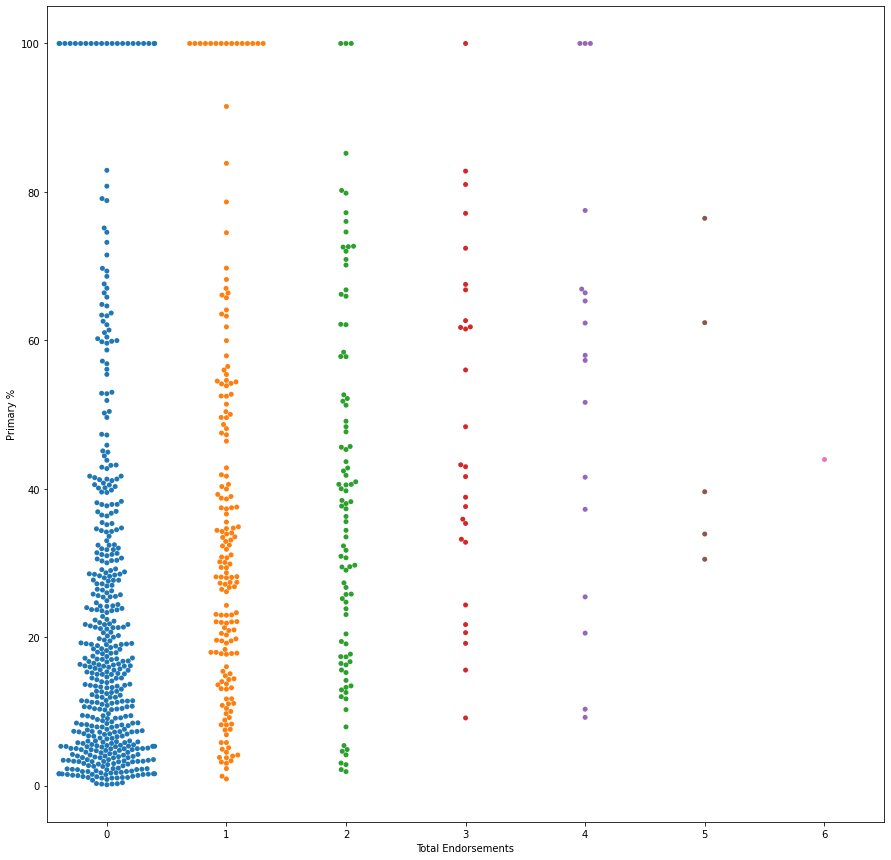

In [15]:
plt.figure(figsize=(15, 15))
party_vote_endorse = all_cand[['Party', 'Primary %', 'Total Endorsements']]
rep_vote_endorse = party_vote_endorse[party_vote_endorse['Party'] == 'R']
dem_vote_endorse = party_vote_endorse[party_vote_endorse['Party'] == 'D']
sns.swarmplot(dem_vote_endorse['Total Endorsements'], dem_vote_endorse['Primary %'], c='blue');

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 19.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


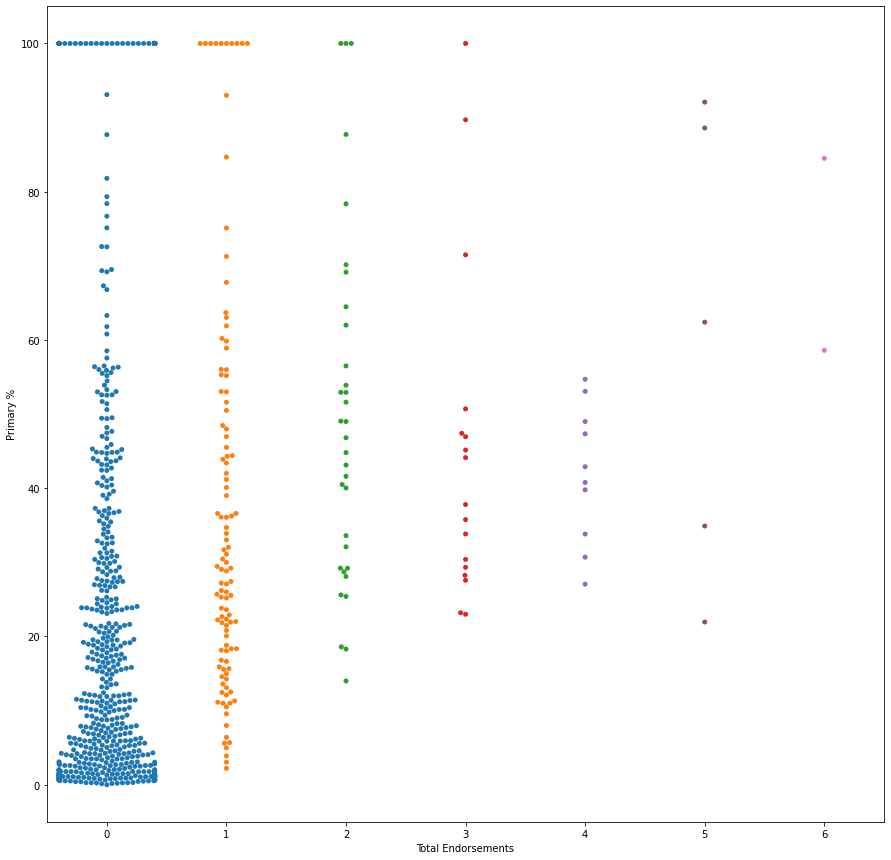

In [16]:
plt.figure(figsize=(15, 15))
sns.swarmplot(rep_vote_endorse['Total Endorsements'], rep_vote_endorse['Primary %'], c='red');

##### Categorical: Total Endorsements vs Count

This histogram shows us the distribution of endorsements across each party. We can see that Republican endorsements are skewed to the right and that they are more conservative in endorsing people (most are not endorsed or only endorsed by 1). The Democrats have a distribution of endorsements that is more uniform but follows the same trend that most people are not endorsed. We suspect that Republicans may be endorsed by less groups, but those groups may be more wealthy.

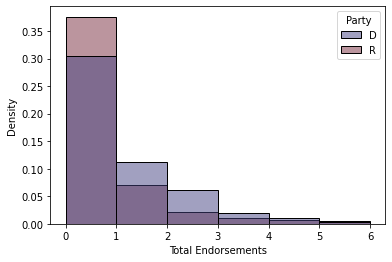

In [17]:
sns.histplot(data=all_cand, x="Total Endorsements", hue="Party", bins=6, palette="icefire", stat='density');

In [18]:
# 13 endorsement groups (15 - last 2 col)
dem.iloc[:, 19:]

,Party Support?,Emily Endorsed?,Guns Sense Candidate?,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?,Total Endorsements,Party
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,D
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,D
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,D
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,D
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,0,0,0,0,0,0,0,0,0,0,0,0,0,0,D
807,0,0,0,0,0,0,0,0,0,0,0,0,0,0,D
808,0,0,0,0,0,0,0,0,0,0,0,0,0,0,D
809,0,0,0,0,0,0,0,0,0,0,1,1,0,2,D


In [19]:
# 14 endorsement groups (16 - last 2 col)
rep.iloc[:, 11:]

,Rep Party Support?,Trump Endorsed?,Bannon Endorsed?,Great America Endorsed?,NRA Endorsed?,Right to Life Endorsed?,Susan B. Anthony Endorsed?,Club for Growth Endorsed?,Koch Support?,House Freedom Support?,Tea Party Endorsed?,Main Street Endorsed?,Chamber Endorsed?,No Labels Support?,Total Endorsements,Party
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,R
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,R
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,R
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,R
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,R
770,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,R
771,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,R
772,0,1,0,0,0,1,0,0,0,0,0,0,0,0,2,R


##### Categorical: Party vs # Endorsement Groups

This is a simple bar graph just to show the difference in number of endorsement groups between the 2 parties. No labels support column is shared.

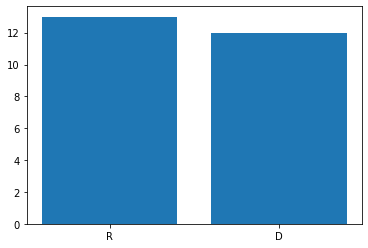

In [20]:
plt.bar(['R', 'D'], [13, 12]);

##### Quantitative: Partisan Lean vs Primary % (with Total Endorsements)

Most no contest elections have low partisan leans. The average lean falls around -15 and most candidates have low primary %. Those with 0 or higher lean start having more endorsements and have higher primary percentages.

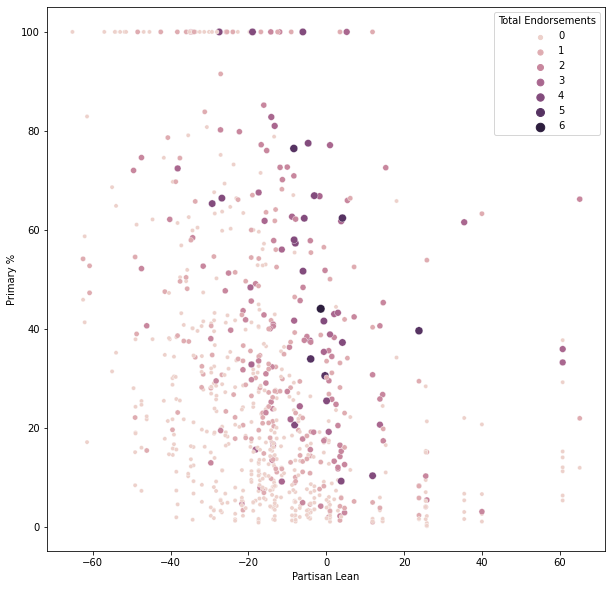

In [21]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data = dem, x='Partisan Lean', y='Primary %', hue='Total Endorsements', size='Total Endorsements');

##### Quantitative: Election date vs Primary %

We wanted to investigate to see if the time of the elections as well as the concentration of elections at those times affect social engagement and lead to closer Primary Races. It seems that at later dates, the average winning percentage starts going up.

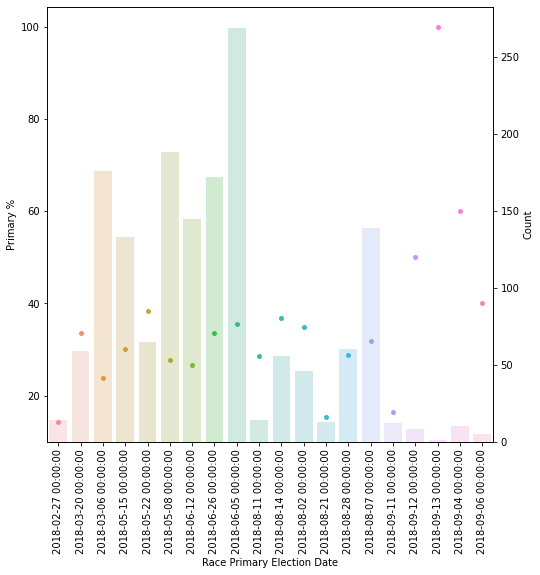

In [22]:
plt.figure(figsize=(8, 8))
group_date = all_cand[['Race Primary Election Date', 'Primary %', 'Candidate']]
group_date = group_date.groupby(by='Race Primary Election Date').agg(
    {'Primary %': np.mean, 'Candidate': len}).rename(columns={'Candidate': 'Count'})
group_date.index = pd.to_datetime(group_date.index)
plt.xticks(rotation=90)
ax = sns.swarmplot(data = group_date, x=group_date.index, y='Primary %')
ax2 = ax.twinx()
sns.barplot(x=group_date.index, y='Count', ax=ax2, data=group_date, alpha=0.25)
plt.show();

# Modeling

#### Research Questions
1. Does having a higher number of endorsements cause a greater share of votes in primary elections? (Causal Inference)
2. Looking at the dataset of endorsements with candidates’ affiliation (e.g. veteran, LGBTQ+, etc.), what is the chance that the candidate will win the Democratic primary based on these features? (Prediction)

### Research Question 1

In [23]:
import statsmodels.api as sm
from patsy.builtins import Q

In [24]:
all_cand['endorsed'] = (all_cand['Total Endorsements'] > 0).astype(int)

In [25]:
all_cand['Race Primary Election Date'] = pd.to_datetime(all_cand['Race Primary Election Date'])
all_cand['days_since_first_election'] = (all_cand['Race Primary Election Date'] 
                                         - all_cand['Race Primary Election Date'].min()).dt.days
all_cand['Democrat'] = (all_cand['Party'] == 'D').astype(int)

In [26]:
' '.join(all_cand.columns)

'Candidate State District Office Type Race Type Race Primary Election Date Primary Status Primary Runoff Status General Status Primary % Won Primary Party Total Endorsements Party Support? Emily Endorsed? Guns Sense Candidate? Biden Endorsed? Warren Endorsed?  Sanders Endorsed? Our Revolution Endorsed? Justice Dems Endorsed? PCCC Endorsed? Indivisible Endorsed? WFP Endorsed? VoteVets Endorsed? No Labels Support? Rep Party Support? Trump Endorsed? Bannon Endorsed? Great America Endorsed? NRA Endorsed? Right to Life Endorsed? Susan B. Anthony Endorsed? Club for Growth Endorsed? Koch Support? House Freedom Support? Tea Party Endorsed? Main Street Endorsed? Chamber Endorsed? endorsed days_since_first_election Democrat'

#### Outcome Regression

In [27]:
# y - primary %
# feature of interest: total number of endorsements
# controls: 
# inverse-propensity weighting:
model_1 = sm.OLS.from_formula("Q('Primary %') ~ C(endorsed) + C(Party) + days_since_first_election",
                  data=all_cand).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Q('Primary %')   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     30.25
Date:                Mon, 09 May 2022   Prob (F-statistic):           5.22e-19
Time:                        16:57:58   Log-Likelihood:                -7508.9
No. Observations:                1574   AIC:                         1.503e+04
Df Residuals:                    1570   BIC:                         1.505e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    21.4927      1.688     12.733      0.000      18.182      24.804
C(endorsed)[T.1]             14.0611      1.581      8.895      0.000      10.961      17.162
C(Party)[T.R]                 3.9138      1.513      2.586      0.010       0.945       6.882
days_since_first_election     0.0323      0.015      2.208      0.027       0.004       0.061
==============================================================================
Omnibus:                      278.766   Durbin-Watson:                   1.196
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              440.095
Skew:                           1.245   Prob(JB):                     2.72e-96
Kurtosis:                       3.715   Cond. No.                         304.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
model_1.params[1]

14.061122674871234

#### Inverse Propensity Weighting

In [29]:
# https://matheusfacure.github.io/python-causality-handbook/11-Propensity-Score.html
from sklearn.linear_model import LogisticRegression as logit
def inv_prop_weight(X, treatment='endorsed'):
    # e(x) = P(Z = 1 | X = x)
    Z = X[treatment]
    X_copy = X.drop(treatment, axis=1)
    log_reg = logit(max_iter=500).fit(X_copy, Z)
    X_copy['propensity_score'] = log_reg.predict_proba(X_copy)[:, 1]
    return X_copy.merge(Z, left_index=True, right_index=True)

In [30]:
X = all_cand[['endorsed', 'Democrat', 'days_since_first_election']]
y_e = all_cand[all_cand.endorsed == 1]['Primary %']
y_ne = all_cand[all_cand.endorsed == 0]['Primary %']
X_prop = inv_prop_weight(X)

In [31]:
weight_e = 1 / X_prop[X_prop.endorsed == 1]['propensity_score']
weight_ne = 1 / (1 - X_prop[X_prop.endorsed == 0]['propensity_score'])

In [32]:
weight = ((X_prop['endorsed'] - X_prop['propensity_score']) /
          (X_prop['propensity_score'] * (1 - X_prop['propensity_score'])))
y1 = np.sum(y_e * weight_e) / len(X)
y0 = np.sum(y_ne * weight_ne) / len(X)
ate = np.mean(weight * pd.concat((y_ne, y_e)))

print('Y1 (endorsed):', y1)
print('Y0 (not endorsed):', y0)
print('ATE:', ate)

Y1 (endorsed): 40.00478313067434
Y0 (not endorsed): 26.32728787789241
ATE: 13.77308130600976


### Research Question 2

In [33]:
list(enumerate(dem.columns))

[(0, 'Candidate'),
 (1, 'State'),
 (2, 'District'),
 (3, 'Office Type'),
 (4, 'Race Type'),
 (5, 'Race Primary Election Date'),
 (6, 'Primary Status'),
 (7, 'Primary Runoff Status'),
 (8, 'General Status'),
 (9, 'Partisan Lean'),
 (10, 'Primary %'),
 (11, 'Won Primary'),
 (12, 'Race'),
 (13, 'Veteran?'),
 (14, 'LGBTQ?'),
 (15, 'Elected Official?'),
 (16, 'Self-Funder?'),
 (17, 'STEM?'),
 (18, 'Obama Alum?'),
 (19, 'Party Support?'),
 (20, 'Emily Endorsed?'),
 (21, 'Guns Sense Candidate?'),
 (22, 'Biden Endorsed?'),
 (23, 'Warren Endorsed? '),
 (24, 'Sanders Endorsed?'),
 (25, 'Our Revolution Endorsed?'),
 (26, 'Justice Dems Endorsed?'),
 (27, 'PCCC Endorsed?'),
 (28, 'Indivisible Endorsed?'),
 (29, 'WFP Endorsed?'),
 (30, 'VoteVets Endorsed?'),
 (31, 'No Labels Support?'),
 (32, 'Total Endorsements'),
 (33, 'Party')]

In [34]:
# Some Cleaning
dem['Won Primary'] = dem['Won Primary'].fillna('No').replace({'Yes':1, 'No':0})
dem['Race'] = dem['Race'].fillna('White').replace({'Nonwhite' : 0, 'White' : 1})

#### Parametric: Frequentist GLM Logistic Regression
We are using a logistic regression GLM model since we are trying to classify whether or not partisan lean and other attributes of a candidate can predict their chance of winning the primary. We can see from the partisan lean vs winning % graph that negative partisan lean tends to have a higher percentage of votes. We are assuming that the data fits to logistic regression. From the results it seems that race and party support seem to be the strongest factors in determining if a candidate wins the primary. Being a veteran or in STEM seem to be the next largest factors.

In [35]:
def plot_confusion_matrix(matrix):
    plt.figure(figsize=(5, 5))
    ax = sns.heatmap(matrix, annot=True, fmt=',', cmap='Blues_r')
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.title('Confusion Matrix\n')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show();

In [36]:
# Evaluation for GLM
# We look at accuracy and confusion matrix result.
# Confusion Matrix: TN, FP, FN, TP

def eval_logit(results, test_y):
    results = [r > 0.5 for r in results]
    accuracy_comp = [r == y for r, y in zip(results, test_y)]
    plot_confusion_matrix(confusion_matrix(results, test_y))
    return np.mean(accuracy_comp)

In [37]:
# Train Test Split
dem_x = dem[['Partisan Lean', 'Race', 'Veteran?', 'LGBTQ?', 'Elected Official?',
             'Self-Funder?', 'STEM?', 'Obama Alum?', 'Party Support?']]
dem_y = dem['Won Primary']
train_dem_x, test_dem_x, train_dem_y, test_dem_y = train_test_split(dem_x, dem_y, test_size=.2, random_state=102)

In [39]:
log_reg = sm.Logit(train_dem_y, train_dem_x).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.563963
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Won Primary   No. Observations:                  648
Model:                          Logit   Df Residuals:                      639
Method:                           MLE   Df Model:                            8
Date:                Mon, 09 May 2022   Pseudo R-squ.:                 0.08183
Time:                        16:57:58   Log-Likelihood:                -365.45
converged:                       True   LL-Null:                       -398.02
Covariance Type:            nonrobust   LLR p-value:                 4.527e-11
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Partisan Lean        -0.0232      0.005     -4.914      0.000      -0.032      -0.014
Race                 -1.2064      0.155     -7.763      0.000      -1.511      -0.902
Veteran?             -0.7050      0.270     -2.616      0.009      -1.233      -0.177
LGBTQ?               -0.6745      0.510     -1.322      0.186      -1.675       0.326
Elected Official?     0.3480      0.240      1.447      0.148      -0.123       0.819
Self-Funder?         -0.0500      0.407     -0.123      0.902      -0.848       0.748
STEM?                -0.8121      0.266     -3.049      0.002      -1.334      -0.290
Obama Alum?          -0.0835      0.451     -0.185      0.853      -0.968       0.801
Party Support?        4.0540      0.758      5.348      0.000       2.568       5.540
=====================================================================================
"""

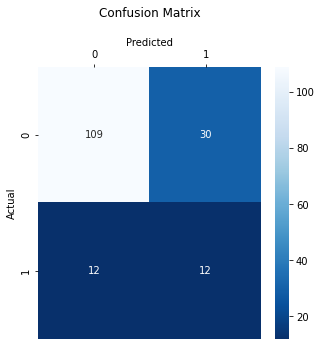

Accuracy: 0.7423312883435583


In [40]:
log_result = log_reg.predict(test_dem_x)
print('Accuracy:', eval_logit(log_result, test_dem_y))

In [41]:
# Train Test Split 2
model_2_cols = ['Race', 'Veteran?', 'LGBTQ?', 'Elected Official?', 'STEM?', 'Party Support?']
train_dem_x_2, test_dem_x_2 = train_dem_x[model_2_cols], test_dem_x[model_2_cols]
train_dem_y_2, test_dem_y_2 = train_dem_y, test_dem_y

In [42]:
# We can look at the model with less impactful factors removed
log_reg_2 = sm.Logit(train_dem_y_2, train_dem_x_2).fit()
log_reg_2.summary()

Optimization terminated successfully.
         Current function value: 0.584323
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Won Primary   No. Observations:                  648
Model:                          Logit   Df Residuals:                      642
Method:                           MLE   Df Model:                            5
Date:                Mon, 09 May 2022   Pseudo R-squ.:                 0.04868
Time:                        16:57:58   Log-Likelihood:                -378.64
converged:                       True   LL-Null:                       -398.02
Covariance Type:            nonrobust   LLR p-value:                 2.662e-07
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Race                 -0.7738      0.119     -6.525      0.000      -1.006      -0.541
Veteran?             -0.4708      0.256     -1.840      0.066      -0.972       0.031
LGBTQ?               -0.6474      0.499     -1.297      0.195      -1.625       0.331
Elected Official?     0.1399      0.228      0.614      0.539      -0.307       0.586
STEM?                -0.7372      0.259     -2.843      0.004      -1.245      -0.229
Party Support?        3.6932      0.743      4.970      0.000       2.237       5.150
=====================================================================================
"""

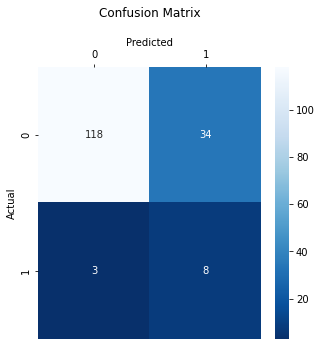

Accuracy: 0.7730061349693251


In [43]:
log_result_2 = log_reg_2.predict(test_dem_x_2)
print('Accuracy:', eval_logit(log_result_2, test_dem_y_2))

Results are evaluated by accuracy and a confusion matrix. Accuracy is used to see how correct our predictions are to the true values. A confusion matrix serves to show the TN, FP, FN, and TP values to check if there are problems with class distribution.

#### Parametric: Bayesian GLM Logistic Regression
The Bayesian GLM uses a logit link function and a binomial distribution. This makes sense since we are trying to do a classification task. We can imagine a log function with binomial distributions along the regression lines. We are assuming the distribution of the data takes on a binomial shape along the logistic regression. We reduce the amount of variables here to 5 variables since the task takes a long time to run.

In [47]:
with pm.Model() as bayes_model:
    pm.glm.GLM.from_formula("Q('Won Primary') ~ Q('Partisan Lean') + Race + Q('Veteran?') + Q('STEM?') + Q('Party Support?')",
                         dem, family=pm.glm.families.Binomial()) 
    # PYMC3 automatically uses logit link function and adds an intercept term
    trace_binomial = pm.sample(1000, cores=2, target_accept=0.95, init='adapt_diag', return_inferencedata=True)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Q('Party Support?'), Q('STEM?'), Q('Veteran?'), Race, Q('Partisan Lean'), Intercept]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 16 seconds.


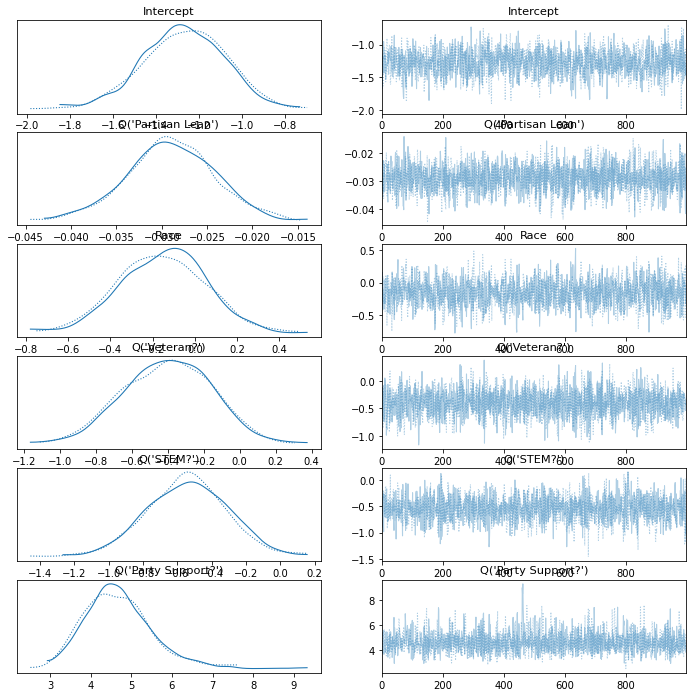

In [45]:
az.plot_trace(trace_binomial);

In [46]:
# https://docs.pymc.io/en/v3/pymc-examples/examples/generalized_linear_models/GLM-logistic.html
def lm_full(trace, partisan_lean, race, veteran, stem, party_support):
    shape = np.broadcast(partisan_lean, race, veteran, stem, party_support).shape
    x_norm = np.asarray([np.broadcast_to(x, shape) for x in [partisan_lean, race, veteran, stem, party_support]])
    return 1 / (
        1
        + np.exp(
            -(
                trace['Intercept']
                + trace["Q('Partisan Lean')"] * x_norm[0]
                + trace['Race'] * x_norm[1]
                + trace["Q('Veteran?')"] * x_norm[2]
                + trace["Q('STEM?')"] * x_norm[3]
                + trace["Q('Party Support?')"] * x_norm[4]
            )
        )
    )

In [48]:
with bayes_model:
    binomial_ppc = pm.sample_posterior_predictive(trace_binomial, model=bayes_model)
    #binomial_ppc['y'] = binomial_ppc['y'].mean(axis=1)

In [79]:
lm_1 = lambda x, samples: lm_full(samples, x, race=1, veteran=0, stem=0, party_support=0)
lm_2 = lambda x, samples: lm_full(samples, x, race=0, veteran=0, stem=0, party_support=0)
lm_3 = lambda x, samples: lm_full(samples, x, race=1, veteran=0, stem=1, party_support=0)
lm_4 = lambda x, samples: lm_full(samples, x, race=1, veteran=1, stem=0, party_support=0)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pymc3/plots/posteriorplot.py:62: DeprecationWarning: The `plot_posterior_predictive_glm` function will migrate to Arviz in a future release. 
Keep up to date with `ArviZ <https://arviz-devs.github.io/arviz/>`_ for future updates.
  DeprecationWarning,


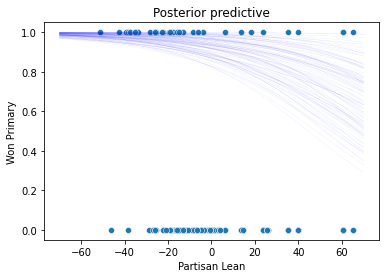

In [68]:
# Plot PPC
pm.plot_posterior_predictive_glm(
    trace_binomial, eval=np.linspace(-70, 70, 100), samples=100, lm=lm_2, color="blue", alpha=0.15
)
sns.scatterplot(x='Partisan Lean', y='Won Primary', data=dem[
    (dem['Race'] == 0)
    & (dem['Veteran?'] == 0)
    & (dem['STEM?'] == 0)
    & (dem['Party Support?'] == 0)
]);
# az.plot_hdi(
#     dem['Partisan Lean'],
#     binomial_ppc["y"],
#     #ax=ax,
#     hdi_prob=0.95,
#     fill_kwargs={"alpha": 0.8, "color": "#a1dab4", "label": "95% credible interval for y_rep's"},
# )
# pm.plot_posterior_predictive_glm(
#     trace_binomial, eval=np.linspace(-70, 70, 100), samples=100, lm=lm_1, color="red", alpha=0.15
# )

# az.plot_ppc(az.from_pymc3(posterior_predictive=binomial_ppc, model=bayes_model), figsize=(10, 10));
# plt.xlabel('y = Won Primary')
# plt.title('Bayesian Binomial Regression')
# plt.show();

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pymc3/plots/posteriorplot.py:62: DeprecationWarning: The `plot_posterior_predictive_glm` function will migrate to Arviz in a future release. 
Keep up to date with `ArviZ <https://arviz-devs.github.io/arviz/>`_ for future updates.
  DeprecationWarning,


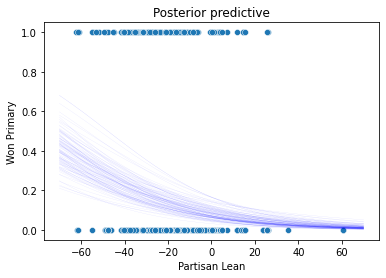

In [77]:
pm.plot_posterior_predictive_glm(
    trace_binomial, eval=np.linspace(-70, 70, 100), samples=100, lm=lm_1, color="blue", alpha=0.15
)
sns.scatterplot(x='Partisan Lean', y='Won Primary', data=dem[
    (dem['Race'] == 1)
    & (dem['Veteran?'] == 0)
    & (dem['STEM?'] == 0)
    & (dem['Party Support?'] == 0)
]);

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pymc3/plots/posteriorplot.py:62: DeprecationWarning: The `plot_posterior_predictive_glm` function will migrate to Arviz in a future release. 
Keep up to date with `ArviZ <https://arviz-devs.github.io/arviz/>`_ for future updates.
  DeprecationWarning,


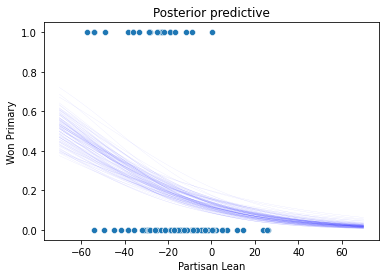

In [80]:
pm.plot_posterior_predictive_glm(
    trace_binomial, eval=np.linspace(-70, 70, 100), samples=100, lm=lm_3, color="blue", alpha=0.15
)
sns.scatterplot(x='Partisan Lean', y='Won Primary', data=dem[
    (dem['Race'] == 1)
    & (dem['Veteran?'] == 0)
    & (dem['STEM?'] == 1)
    & (dem['Party Support?'] == 0)
]);

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pymc3/plots/posteriorplot.py:62: DeprecationWarning: The `plot_posterior_predictive_glm` function will migrate to Arviz in a future release. 
Keep up to date with `ArviZ <https://arviz-devs.github.io/arviz/>`_ for future updates.
  DeprecationWarning,


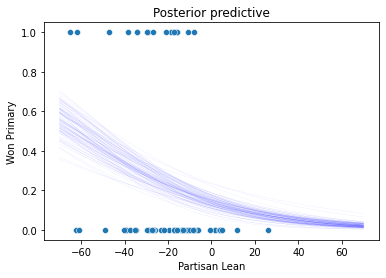

In [81]:
pm.plot_posterior_predictive_glm(
    trace_binomial, eval=np.linspace(-70, 70, 100), samples=100, lm=lm_4, color="blue", alpha=0.15
)
sns.scatterplot(x='Partisan Lean', y='Won Primary', data=dem[
    (dem['Race'] == 1)
    & (dem['Veteran?'] == 1)
    & (dem['STEM?'] == 0)
    & (dem['Party Support?'] == 0)
]);

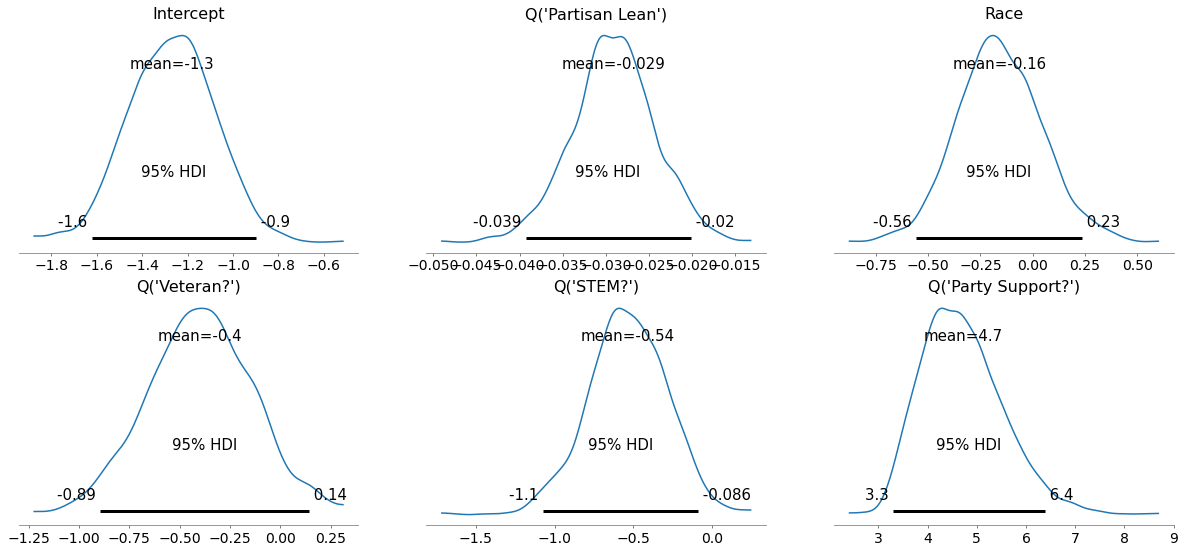

In [69]:
pm.plot_posterior(trace_binomial, hdi_prob=0.95);

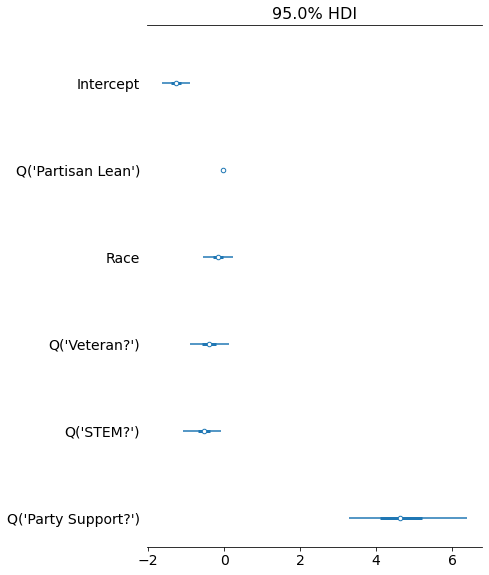

In [70]:
az.plot_forest(trace_binomial, hdi_prob=0.95, combined=True);

#### Non-parametric: Random Forest
We use a random forest to generate multiple decision trees for classification. This is non-parametric since it makes decisions based on comparisons and not by calculation. A random forest makes sense since it uses multiple decision trees to make a decision on whether a candidate has won, then takes a vote with its trees to determine the final decision. We keep all the candidate attributes since its effectiveness is irrelevant to the GLM results.

In [71]:
# Eval Random Forest Result
# We look at accuracy and confusion matrix result.
# Confusion Matrix: TN, FP, FN, TP

def eval_r_forest(results, test_y):
    accuracy_comp = [r == y for r, y in zip(results, test_y)]
    plot_confusion_matrix(confusion_matrix(results, test_y))
    return np.mean(accuracy_comp)

In [72]:
# Non-Parametric: Random Forest
r_forest = RandomForestClassifier().fit(train_dem_x, train_dem_y)

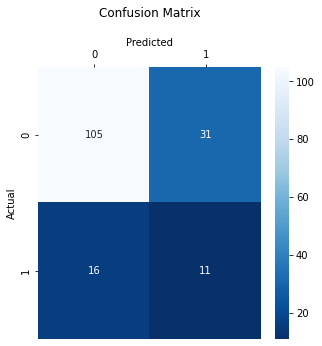

Accuracy: 0.7116564417177914


In [73]:
r_for_result = r_forest.predict(test_dem_x)
print('Accuracy:', eval_r_forest(r_for_result, test_dem_y))

Results are evaluated by accuracy and a confusion matrix. Accuracy is used to see how correct our predictions are to the true values. A confusion matrix serves to show the TN, FP, FN, and TP values to check if there are problems with class distribution.